In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# CSV file
file_path = 'data/iith_foml_2023_train.csv'
data = pd.read_csv(file_path)

In [3]:
# Assuming the target variable column is named "Target Variable (Discrete)"
target_counts = data['Target Variable (Discrete)'].value_counts()

print("Number of instances for each category:")
print(target_counts)

# 16 , 13 , 11 , 9 , 7 - kNN
# 16 , 13 , 12 , 11 , 10 , 9 , 7 - RF

Number of instances for each category:
1     488
0     249
2     109
6      70
5      41
8       7
14      5
7       5
15      4
4       3
13      3
3       3
9       2
12      1
17      1
11      1
10      1
16      1
Name: Target Variable (Discrete), dtype: int64


In [4]:
# Duplicate instances for classes 10, 11, 12, 16, 17
classes_to_duplicate = [10, 11, 12, 16, 17]
for class_label in classes_to_duplicate:
    class_instances = data[data['Target Variable (Discrete)'] == class_label]
    duplicated_instances = pd.concat([class_instances] * 2, ignore_index=True)
    data = pd.concat([data, duplicated_instances], ignore_index=True)

# Duplicate one instance for class 9
class_9_instances = data[data['Target Variable (Discrete)'] == 9]
duplicated_class_9 = pd.concat([class_9_instances] * 1, ignore_index=True)
data = pd.concat([data, duplicated_class_9], ignore_index=True)


In [5]:
# Assuming the target variable column is named "Target Variable (Discrete)"
target_counts = data['Target Variable (Discrete)'].value_counts()

print("Number of instances for each category:")
print(target_counts)

Number of instances for each category:
1     488
0     249
2     109
6      70
5      41
8       7
14      5
7       5
9       4
15      4
3       3
12      3
4       3
13      3
17      3
11      3
10      3
16      3
Name: Target Variable (Discrete), dtype: int64


In [42]:
# Define the target variable values to exclude
exclude_values = {1, 0, 2, 6, 5}

# Create a subset where the target variable is not in exclude_values
subset_data = data[~data['Target Variable (Discrete)'].isin(exclude_values)]

# Display the subset
print("Subset of data where target variable is not in {1, 0, 2, 6, 5}:")
(subset_data)

data = subset_data

Subset of data where target variable is not in {1, 0, 2, 6, 5}:


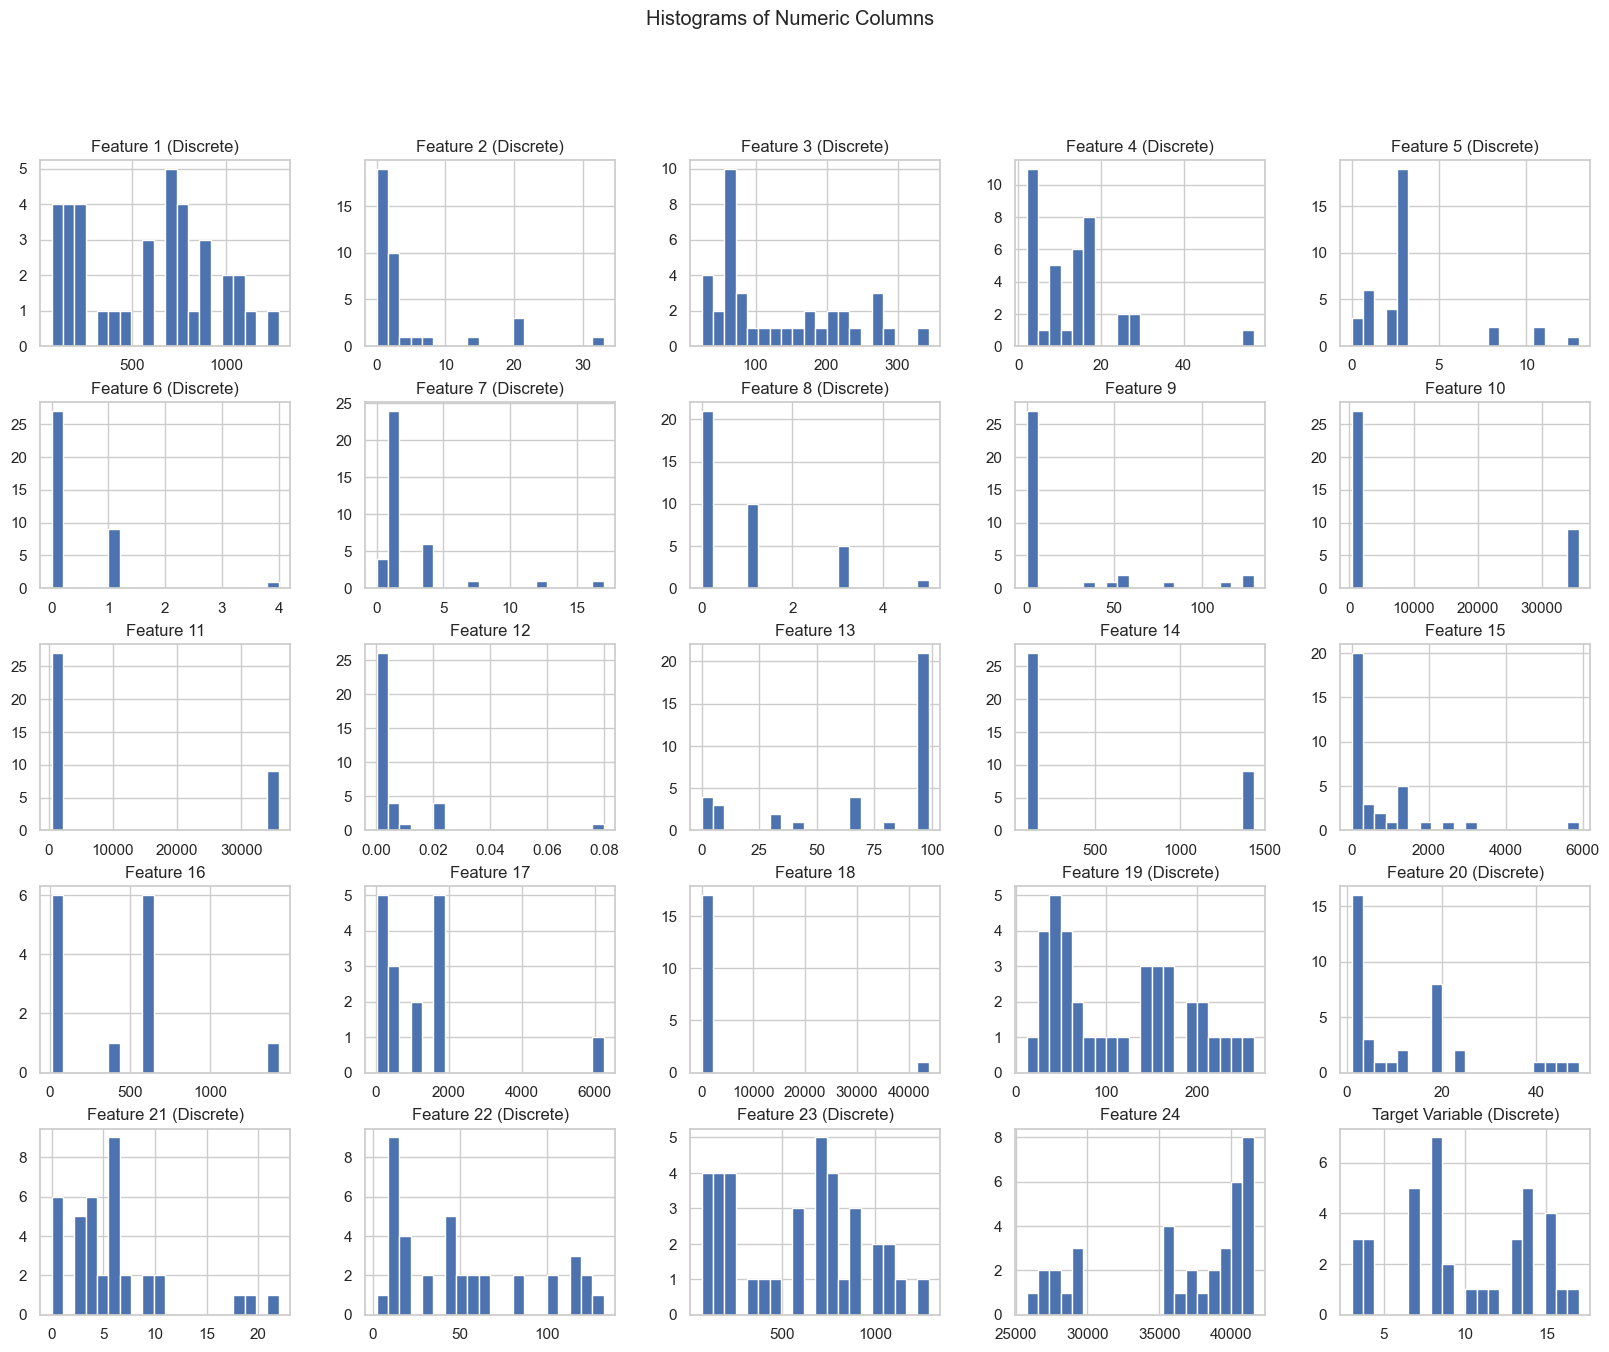

In [43]:
# Visualize the distribution of numeric columns using histograms
subset_data.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

In [44]:
# # Assuming 'Target Variable (Discrete)' is the target variable column
# target_variable = 'Target Variable (Discrete)'

# # Get the list of predictor variables
# predictor_variables = [col for col in data.columns if col != target_variable]


# # Plot each predictor variable against the target variable
# for predictor_var in predictor_variables:
#     plt.figure(figsize=(10, 6))
#     if data[predictor_var].dtype == 'O':  # Categorical variable
#         sns.countplot(x=predictor_var, hue=target_variable, data=data)
#         plt.xticks(rotation=45)
#     else:  # Continuous variable
#         sns.histplot(data, x=predictor_var, hue=target_variable, multiple="stack", bins=30, kde=True)
#     plt.title(f"{predictor_var} vs {target_variable}")
#     plt.show()

In [45]:
data.head(10)

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
11,565,20,58,18,3,1,1,1,55.002,35782.3,...,1426.3,6250.002,12.04,39,18,0,12,565,37605.3,12
37,795,0,202,2,3,0,1,3,0.001,493.1,...,NaN,NaN,NaN,61,1,1,10,795,40971.1,15
59,562,20,58,18,3,1,1,1,48.045,35776.1,...,NaN,NaN,43895.02,39,18,6,101,562,27807.2,3
118,735,0,181,18,3,1,1,1,32.501,35700.3,...,598.2,1600.002,12.03,154,18,6,114,735,41384.5,14
189,197,2,71,28,3,1,7,1,128.004,35783.1,...,NaN,NaN,NaN,62,24,0,19,197,36744.2,9
210,176,0,59,10,3,0,1,5,0.004,325.3,...,NaN,600.003,2.05,55,4,4,2,176,39265.1,8
237,891,33,228,57,3,0,4,0,0.004,661.4,...,NaN,NaN,NaN,159,23,5,30,891,37790.5,7
241,76,0,27,10,1,0,0,0,0.004,613.4,...,12.3,NaN,NaN,28,1,5,11,76,40018.3,4
262,1090,3,276,2,2,0,1,0,0.004,631.3,...,NaN,NaN,NaN,249,1,4,84,1090,37168.4,13
273,731,20,58,18,3,1,1,1,55.004,35695.5,...,615.3,1660.002,12.01,145,18,6,16,731,39635.2,14


In [46]:
data.corr()

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
Feature 1 (Discrete),1.000000,0.108543,0.788538,0.175725,0.198418,0.114312,0.095664,-0.133205,0.025428,0.059226,...,0.568537,0.099071,0.029383,0.801554,0.398714,0.125399,0.352428,0.999996,0.415215,0.570986
Feature 2 (Discrete),0.108543,1.000000,-0.096790,0.550996,0.019646,0.058530,0.096306,-0.143754,0.069463,0.234688,...,0.562940,0.546464,0.480390,-0.022417,0.255960,-0.160283,0.017521,0.107984,-0.121135,-0.046543
Feature 3 (Discrete),0.788538,-0.096790,1.000000,0.017119,0.119277,0.008798,0.185860,-0.062077,-0.179311,-0.185098,...,0.165610,-0.230465,-0.153164,0.623528,0.088916,0.156131,0.173712,0.789063,0.376258,0.376879
Feature 4 (Discrete),0.175725,0.550996,0.017119,1.000000,0.068151,0.149098,-0.029562,-0.282052,0.302655,0.237035,...,0.440362,0.238677,0.160485,0.087526,0.470498,-0.010060,-0.002936,0.175147,-0.007741,-0.132897
Feature 5 (Discrete),0.198418,0.019646,0.119277,0.068151,1.000000,0.428058,0.377522,-0.065826,-0.010773,-0.032033,...,0.136274,-0.131383,-0.099216,0.303070,0.421721,0.468858,0.454101,0.197827,-0.213152,0.269531
Feature 6 (Discrete),0.114312,0.058530,0.008798,0.149098,0.428058,1.000000,0.005307,0.072920,0.891425,0.999978,...,0.819789,0.655000,0.304461,0.041753,0.475343,0.364406,0.389467,0.113804,0.218219,0.377959
Feature 7 (Discrete),0.095664,0.096306,0.185860,-0.029562,0.377522,0.005307,1.000000,-0.080014,0.026991,0.099264,...,0.148027,-0.293579,-0.090800,0.063406,-0.061837,-0.239808,0.287407,0.095137,0.028391,0.241063
Feature 8 (Discrete),-0.133205,-0.143754,-0.062077,-0.282052,-0.065826,0.072920,-0.080014,1.000000,0.076998,0.086171,...,0.819789,0.162210,-0.000039,-0.144668,-0.207629,-0.103784,-0.227955,-0.132605,0.380035,0.139522
Feature 9,0.025428,0.069463,-0.179311,0.302655,-0.010773,0.891425,0.026991,0.076998,1.000000,0.891563,...,0.623232,0.466501,0.114348,-0.023007,0.299522,-0.152996,0.123942,0.025016,0.219864,0.288271
Feature 10,0.059226,0.234688,-0.185098,0.237035,-0.032033,0.999978,0.099264,0.086171,0.891563,1.000000,...,0.820940,0.656028,0.305090,-0.116072,0.261964,-0.190287,0.275762,0.058698,0.214396,0.312902


In [4]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Feature 1 (Discrete)        994 non-null    int64  
 1   Feature 2 (Discrete)        994 non-null    int64  
 2   Feature 3 (Discrete)        994 non-null    int64  
 3   Feature 4 (Discrete)        994 non-null    int64  
 4   Feature 5 (Discrete)        994 non-null    int64  
 5   Feature 6 (Discrete)        994 non-null    int64  
 6   Feature 7 (Discrete)        994 non-null    int64  
 7   Feature 8 (Discrete)        994 non-null    int64  
 8   Feature 9                   980 non-null    float64
 9   Feature 10                  993 non-null    float64
 10  Feature 11                  993 non-null    float64
 11  Feature 12                  993 non-null    float64
 12  Feature 13                  993 non-null    float64
 13  Feature 14    

In [48]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
(data.describe())


Summary Statistics for Numeric Columns:


,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,35.000000,36.000000,...,14.000000,16.000000,18.000000,37.000000,37.000000,37.000000,37.000000,37.000000,36.000000,37.000000
mean,585.729730,4.081081,128.324324,12.918919,3.297297,0.351351,2.270270,0.810811,18.367057,9371.358333,...,397.992857,1163.065500,2444.054444,115.891892,12.027027,5.891892,51.081081,586.000000,36419.238889,9.864865
std,363.356165,7.525432,91.296542,10.894388,3.026410,0.753371,3.380078,1.243602,38.398203,15439.610502,...,406.698152,1504.655949,10344.798313,74.537009,13.857382,4.897753,40.608824,363.839861,5303.344480,4.171079
min,70.000000,0.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.001000,325.300000,...,12.100000,14.005000,1.010000,12.000000,1.000000,0.000000,2.000000,70.000000,25757.500000,3.000000
25%,201.000000,0.000000,58.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.002000,500.425000,...,13.175000,120.003000,2.035000,48.000000,1.000000,3.000000,12.000000,201.000000,34190.650000,7.000000
50%,731.000000,0.000000,78.000000,13.000000,3.000000,0.000000,1.000000,0.000000,0.004000,646.350000,...,496.650000,777.503500,3.040000,110.000000,4.000000,5.000000,45.000000,731.000000,38925.300000,9.000000
75%,853.000000,3.000000,202.000000,18.000000,3.000000,1.000000,1.000000,1.000000,0.005000,9537.850000,...,598.300000,1600.002500,12.030000,170.000000,18.000000,6.000000,84.000000,853.000000,40407.025000,14.000000
max,1281.000000,33.000000,344.000000,57.000000,13.000000,4.000000,17.000000,5.000000,129.501000,35783.100000,...,1426.300000,6250.002000,43895.020000,263.000000,49.000000,22.000000,133.000000,1286.000000,41602.100000,17.000000


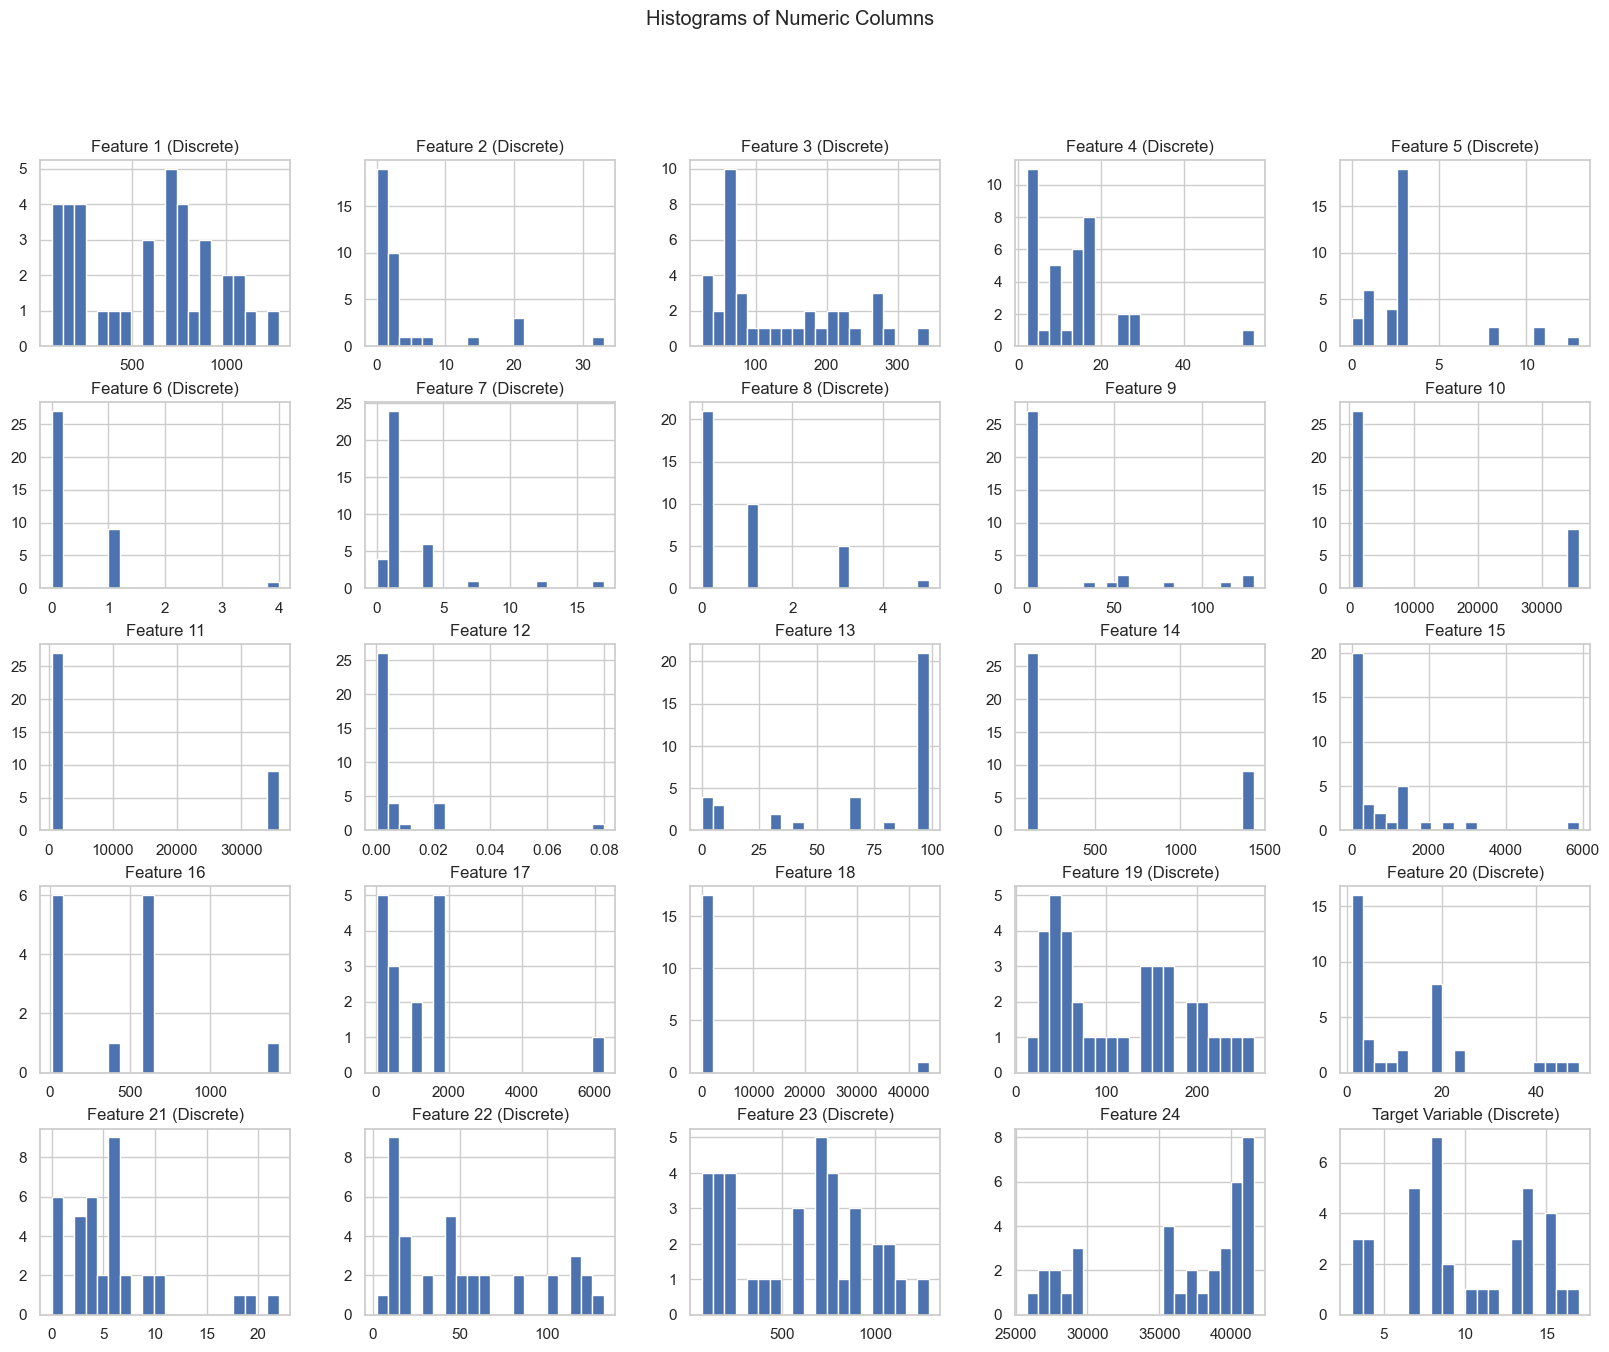

In [49]:
# Visualize the distribution of numeric columns using histograms
data.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

In [50]:
# Assuming the target variable column is named "Target Variable (Discrete)"
X = data.drop(columns=['Target Variable (Discrete)'])
y = data['Target Variable (Discrete)']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [51]:
# # Standardize the features
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# X_standardized = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

In [52]:
# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=0.95)  # You can adjust the explained variance threshold
# X_pca = pca.fit_transform(X_imputed)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [54]:
rf_model = RandomForestClassifier(random_state=42)

In [55]:
# Perform cross-validation and calculate F1 macro as the metric
cross_val_f1_macro = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1_macro')
print("Cross-Validation F1 Macro Scores:", cross_val_f1_macro)
print("Mean F1 Macro:", cross_val_f1_macro.mean())

c:\Users\Abhay Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation F1 Macro Scores: [0.44444444 0.38095238 0.52380952 0.33333333 0.33333333]
Mean F1 Macro: 0.4031746031746032


In [56]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate F1 Macro on the test set
test_f1_macro = f1_score(y_test, y_pred, average='macro')
print("Test F1 Macro:", test_f1_macro)

Test F1 Macro: 0.125


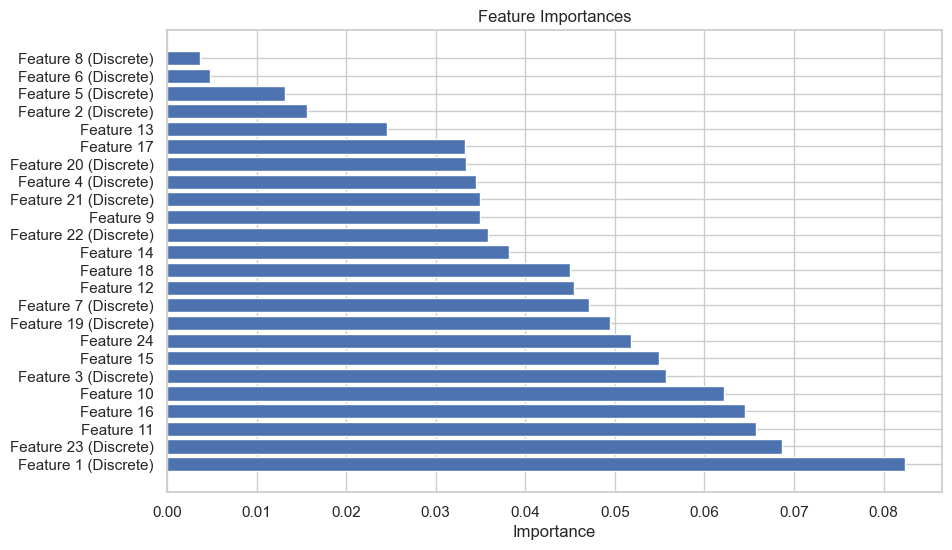

In [57]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [58]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Extract one of the trees from the forest (e.g., the first tree)
tree = rf_model.estimators_[0]

# Visualize the tree graphically and save as PDF
dot_data = export_graphviz(tree, out_file=None, feature_names=list(X_train.columns),
                           class_names=list(map(str, rf_model.classes_)), filled=True, rounded=True,
                           special_characters=True)

graph = Source(dot_data)
graph.render("random_forest_tree", format="pdf", cleanup=True)

# Open the PDF file
graph.view("random_forest_tree")

Error: Could not open "random_forest_tree.pdf" for writing : Permission denied


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'random_forest_tree']' returned non-zero exit status 1. [stderr: b'Error: Could not open "random_forest_tree.pdf" for writing : Permission denied\r\n']

In [59]:
# Calculate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.12         8
   macro avg       0.12      0.12      0.12         8
weighted avg       0.12      0.12      0.12         8


Confusion Matrix:
[[0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]]


c:\Users\Abhay Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abhay Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abhay Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [ ]:
def predict_and_write_results(model, test_data_path, output_file_path):

    # Load test data
    test_data = pd.read_csv(test_data_path)

    # Impute missing values in test data
    X_test_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

    # Make predictions on the test data
    predictions = model.predict(X_test_imputed)

    # Create a DataFrame for results with ID and Predicted Category columns
    results_df = pd.DataFrame({
        'ID': np.arange(1, len(predictions) + 1),  # Assuming IDs start from 1
        'Category': predictions
    })

    # Write the results to a CSV file
    results_df.to_csv(output_file_path, index=False)

# Example usage:
# Replace 'your_test_data.csv', 'output_results.csv' with your actual file paths
predict_and_write_results(rf_model, 'data/iith_foml_2023_test.csv', 'output_results.csv')
